# Image Classification

This code shows how images, specifically vehicle images like cars, trucks, vans, bikes, motorcycles and others, can be classified using Convolutional Neural Network (CNN). This code is built based on an image classifier developed for the "Applied Data Science: Machine Learning" Program from the EPFL Lausanne.
The dataset consists of Swissroads data set which contains several hundreds images of vehicles found in the EPFL - Lausanne area including cars, trucks, vans, bikes, motorcycles and others. The dataset is quite small, hence the results, but could easily be extended to include other datasets and other vehicles classes.

In [1]:
# filter warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import tensorflow as tf
from tensorflow import keras

# keras imports
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from keras.utils.vis_utils import plot_model
from keras import backend as K 


import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imread, imshow, subplots, show

from numpy import expand_dims

import cv2
from PIL import Image

In [2]:
BATCH_SIZE = 32
IMG_HEIGHT = 256
IMG_WIDTH = 256
NUM_CLASSES = 6
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH)

In [3]:
base_dir = os.getcwd()  # Get the current working directory
data_dir = os.path.join(base_dir, 'swissroads')
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
valid_dir = os.path.join(data_dir, 'valid')

In [4]:
PATH = '/sample_image/000006_04.jpg'

***
**Utility functions**
***

In [33]:
def plot_augm_images(datagen):
    """
    Plots 8 images generated by an object of the ImageDataGenerator class.
    """
#     datagen.fit(images)
    it = datagen.flow(samples, batch_size=1)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(it.next()[0].astype('int'))
        row.axis('off')
    show()

In [6]:
# Plot images in the form of a grid with 1 row and 5 columns where images are placed in each column to check the data augmentation used.
def plot_raw_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

***
**Exploratory Data Analysis**
***

In [7]:
# apply data augmentation to improve overfitting
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    fill_mode='nearest') # Generator for our training data

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 280 images belonging to 6 classes.


In [9]:
sample_training_images, _ = next(train_data_gen)

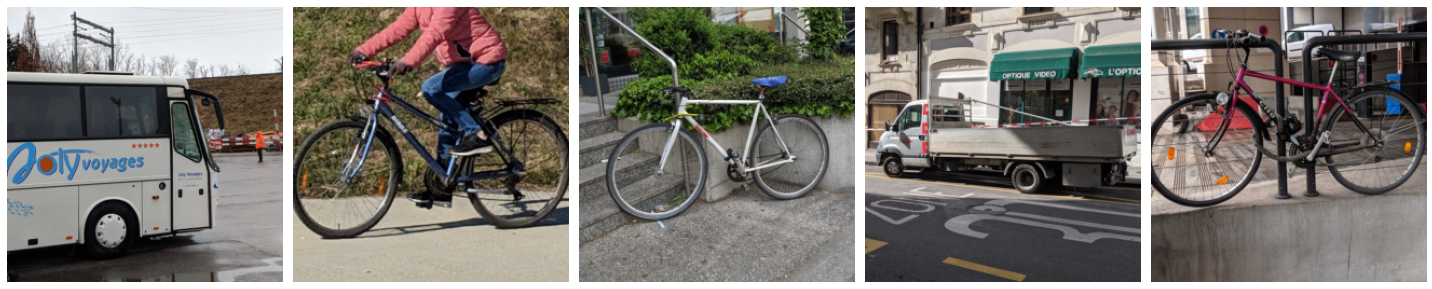

In [10]:
plot_raw_images(sample_training_images[:5])

***
**Data Preprocessing**
***

In [34]:
# Loading desired images
img = load_img(PATH)

# For processing, we are converting the image(s) to an array
data = img_to_array(img)

# Expanding dimension to one sample
samples = expand_dims(data, 0)

**Random Rotations**

The image rotation technique enables the model by generating images of different orientations.

The ImageDataGenerator class in Keras uses this technique to generate randomly rotated images in which the angle can range from 0 degrees to 360 degrees. Our example goes like this:

- The first step is to import the necessary libraries and load the image.
- The next step is to convert the image to an array for processing. Next, we perform expansion of the array by inserting a new axis.
- Then we call the ImageDataGenerator function and pass the `rotation_range` argument in this function.
- Now, an iterator is constructed for data augmentation
- Lastly, we are plotting the samples and images for the displaying output.

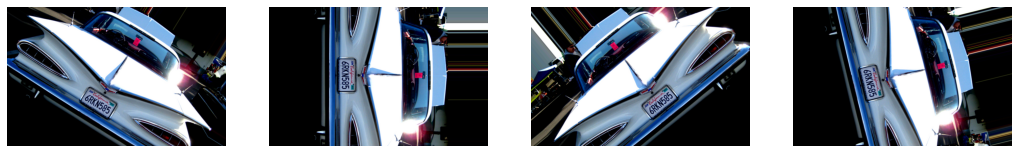

In [35]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(rotation_range=90)

plot_augm_images(datagen)

**Random Shifts**

The random shifts technique helps in improving those images that are not properly positioned. There can be a scenario where they are not in the center of actual orientation.

Keras ImageDataGenerator uses parameters `height_shift_range` for vertical shifts in an image and for horizontal shifts in an image, we can use `width_shift_range`. The values specified are either specified in the form of percentage or integer.

Going forward the code for loading libraries and sample image will be the same as in the first example, with only the differing data augmentation part.

**Horizontal Shift Example**

For horizontal shift, we are using `width_shift_range` argument.

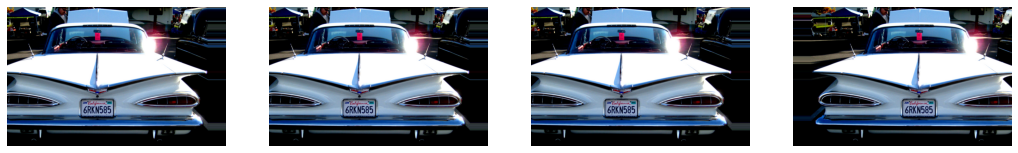

In [36]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(width_shift_range=[-200,200])

plot_augm_images(datagen)

**Vertical Shift Example**

For the vertical shift data augmentation technique, we are using `height_shift_range` argument.

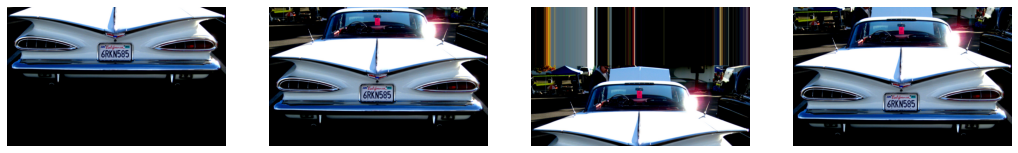

In [37]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(height_shift_range=0.5)

plot_augm_images(datagen)

**Random Flips**

Another beneficial technique for performing augmentation is the flipping of images. ImageDataGenerator helps in flipping the images, it can either flip horizontally or vertically.

The below example shows how we can randomly flip the images.

For horizontal flip operation, we are using `horizontal_flip` argument.

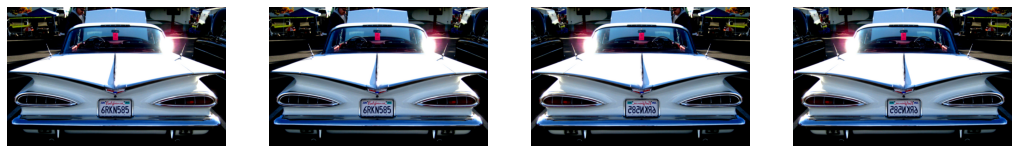

In [38]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(horizontal_flip=True)

plot_augm_images(datagen)

**Random Brightness**

The fourth kind of augmentation technique is altering the brightness of images. This is the most useful technique as in most cases we have images with low or almost no lighting. Thus, we can train our model on the images generated using these images.

For controlling the brightness in the images through ImageDataGenerator, we have an argument called `brightness_range`. For this parameter, the negative values will result in the darkening of images whereas positive values will produce bright images.

The brightness is controlled using `brightness_range` argument.

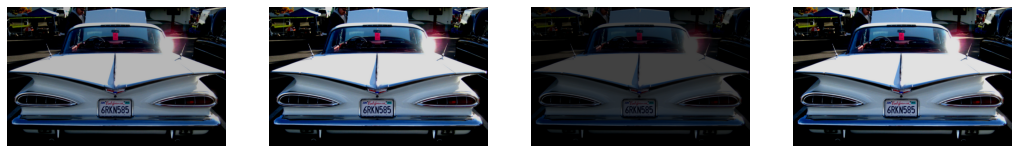

In [39]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])

plot_augm_images(datagen)

**Random Zoom**

The last technique is zooming in or zooming out on any image. ImageDataGenerator class is passed e a float value for the `zoom_range` parameter that takes a lower limit and an upper limit. Once specified, a zoom operation will be applied to an image.

For zooming in, values lesser than 1 should be used. On the other hand, for zooming out, we have to use values greater than 1.

The example for zoom in and zoom out operation can be seen below.

This zooming in and zooming out operation is implemented using `zoom_range` argument.

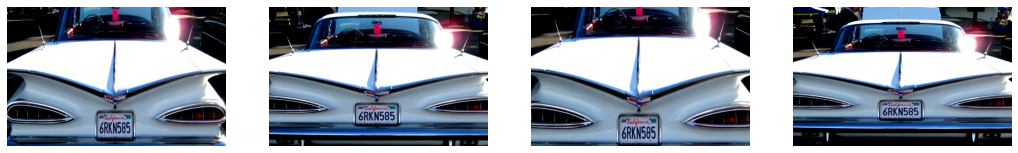

In [40]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])

plot_augm_images(datagen)

***
**Channel Shift**
***

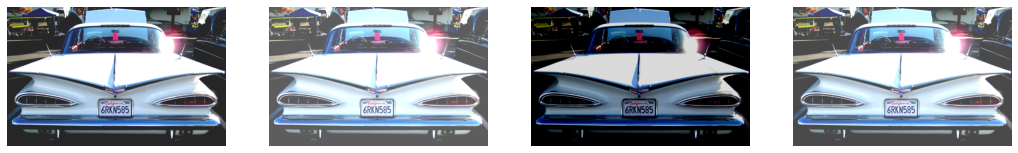

In [41]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(channel_shift_range=150.0)

plot_augm_images(datagen)

***
**Color Transformations**
***

In [14]:
def cspace_transf(image):
    image = np.array(image)
    return cv2.cvtColor(image,cv2.COLOR_RGB2HSV)

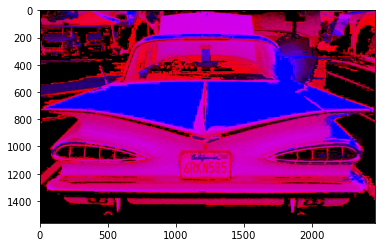

In [15]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(preprocessing_function = cspace_transf)

# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)

# generating images in batches
batch = it.next()
# Remember to convert these images to unsigned integers for viewing 
image = batch[0].astype('uint8')
# Plotting the data
plt.imshow(image)

In [16]:
def cspace_transf(image):
    image = np.array(image)
    return cv2.cvtColor(image,cv2.COLOR_RGB2XYZ)

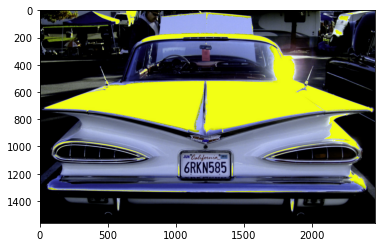

In [17]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(preprocessing_function = cspace_transf)

# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)

# generating images in batches
batch = it.next()
# Remember to convert these images to unsigned integers for viewing 
image = batch[0].astype('uint8')
# Plotting the data
plt.imshow(image)

In [18]:
def cspace_transf(image):
    image = np.array(image)
    return cv2.cvtColor(image,cv2.COLOR_RGB2YUV)

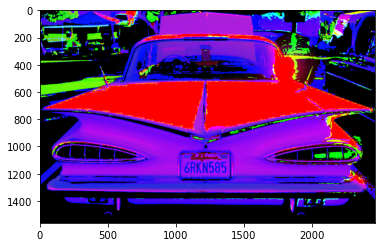

In [19]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(preprocessing_function = cspace_transf)

# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)

# generating images in batches
batch = it.next()
# Remember to convert these images to unsigned integers for viewing 
image = batch[0].astype('uint8')
# Plotting the data
plt.imshow(image)

In [20]:
def cspace_transf(image):
    image = np.array(image)
    return cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

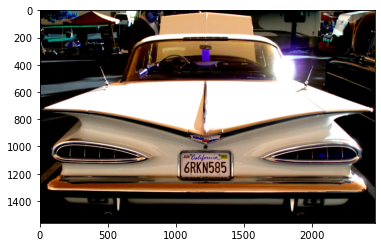

In [21]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(preprocessing_function = cspace_transf)

# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)

# generating images in batches
batch = it.next()
# Remember to convert these images to unsigned integers for viewing 
image = batch[0].astype('uint8')
# Plotting the data
plt.imshow(image)

In [22]:
def cspace_transf(image):
    image = np.array(image)
    return cv2.cvtColor(image,cv2.COLOR_RGB2YCrCb)

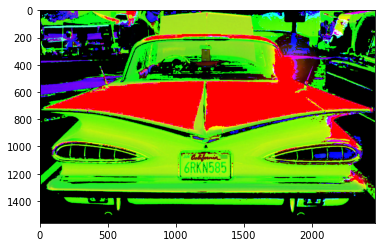

In [23]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(preprocessing_function = cspace_transf)

# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)

# generating images in batches
batch = it.next()
# Remember to convert these images to unsigned integers for viewing 
image = batch[0].astype('uint8')
# Plotting the data
plt.imshow(image)

In [24]:
def cspace_transf(image):
    image = np.array(image)
    return cv2.cvtColor(image,cv2.COLOR_RGB2HLS)

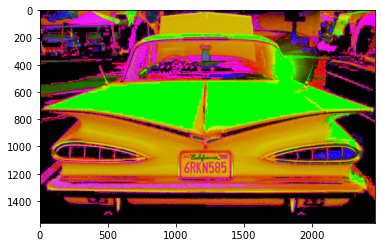

In [25]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(preprocessing_function = cspace_transf)

# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)

# generating images in batches
batch = it.next()
# Remember to convert these images to unsigned integers for viewing 
image = batch[0].astype('uint8')
# Plotting the data
plt.imshow(image)

In [26]:
def cspace_transf(image):
    image = np.array(image)
    return cv2.cvtColor(image,cv2.COLOR_RGB2Lab)

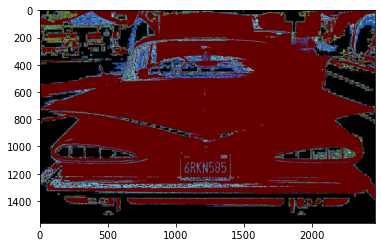

In [27]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(preprocessing_function = cspace_transf)

# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)

# generating images in batches
batch = it.next()
# Remember to convert these images to unsigned integers for viewing 
image = batch[0].astype('uint8')
# Plotting the data
plt.imshow(image)

In [28]:
def cspace_transf(image):
    image = np.array(image)
    return cv2.cvtColor(image,cv2.COLOR_RGB2Luv)

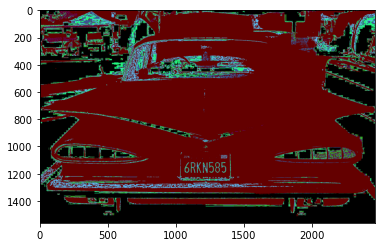

In [29]:
# Calling ImageDataGenerator for creating data augmentation generator.
datagen = ImageDataGenerator(preprocessing_function = cspace_transf)

# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)

# generating images in batches
batch = it.next()
# Remember to convert these images to unsigned integers for viewing 
image = batch[0].astype('uint8')
# Plotting the data
plt.imshow(image)